# A Pseudoproxy Experiment with GraphEM

**Expected time to run through: 10 mins**

This tutorial demonstrates how to get a reconstruction using GraphEM, leveraging a simple pseudoproxy dataset generated from a subset of iCESM gridded dataset.
The pseudoproxy are generated based on the original iCESM simulated `tas` plus white noise with `SNR=1`, using below code block:

```python
# gen pseudoproxy

SNR = 1

pp = np.copy(tas_sub)
nt, nlat, nlon = np.shape(pp)

k = 0
for i in range(nlat):
    for j in range(nlon):
        tas_std = np.std(tas_sub[:,i,j])
        noise_std = tas_std / SNR
        
        np.random.seed(k)
        pp[:,i,j] += np.random.normal(0, noise_std, size=nt)
        
        k += 1
```

## Test data preparation

To go through this tutorial, please prepare test data following the steps:

Download the test case named “PPE” with this [link](https://drive.google.com/drive/folders/1QpXqFgCBA4QMb7vqGIWxptkhWTJp0e8c?usp=sharing).
Create a directory named “testcases” in the same directory where this notebook sits.
Put the unzipped direcotry “PPE” into “testcases”.

Below, we first load some useful packages, including our `GraphEM`.

In [1]:
%load_ext autoreload
%autoreload 2

import LMRt
import GraphEM
import os
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as  plt

## Reconstruction

In [2]:
job = GraphEM.ReconJob()

In [3]:
job.load_configs('./testcases/PPE/configs.yml', verbose=True)

GraphEM: job.load_configs() >>> loading reconstruction configurations from: ./testcases/PPE/configs.yml
GraphEM: job.load_configs() >>> job.configs created
GraphEM: job.load_configs() >>> job.configs["job_dirpath"] = /Users/fzhu/Github/GraphEM/docsrc/tutorial/testcases/PPE/recon
GraphEM: job.load_configs() >>> /Users/fzhu/Github/GraphEM/docsrc/tutorial/testcases/PPE/recon created
{'anom_period': [1951, 1980],
 'calib_period': [1750, 1849],
 'job_dirpath': '/Users/fzhu/Github/GraphEM/docsrc/tutorial/testcases/PPE/recon',
 'job_id': 'LMRt_quickstart',
 'obs_path': {'tas': './data/obs/iCESM_subset.nc'},
 'obs_varname': {'lat': 'lat', 'lon': 'lon', 'tas': 'tas'},
 'proxydb_path': './data/proxy/pseudoproxy_dataset.pkl',
 'ptype_list': ['coral.d18O'],
 'recon_period': [850, 1849]}


In [4]:
job.load_proxydb(verbose=True)

GraphEM: job.load_proxydb() >>> job.configs["proxydb_path"] = /Users/fzhu/Github/GraphEM/docsrc/tutorial/testcases/PPE/data/proxy/pseudoproxy_dataset.pkl
GraphEM: job.load_proxydb() >>> 100 records loaded
GraphEM: job.load_proxydb() >>> job.proxydb created


In [5]:
job.filter_proxydb(verbose=True)

GraphEM: job.filter_proxydb() >>> filtering proxy records according to: ['coral.d18O']
GraphEM: job.filter_proxydb() >>> 100 records remaining


In [6]:
job.load_obs(verbose=True)

GraphEM: job.load_obs() >>> loading instrumental observation fields from: {'tas': '/Users/fzhu/Github/GraphEM/docsrc/tutorial/testcases/PPE/data/obs/iCESM_subset.nc'}
Time axis not overlap with the reference period [1951, 1980]; use its own time period as reference [850.00, 1849.00].
GraphEM: job.load_obs() >>> job.obs created


In [7]:
print(job.obs)

Dataset Overview
-----------------------

     Name:  tas
   Source:  /Users/fzhu/Github/GraphEM/docsrc/tutorial/testcases/PPE/data/obs/iCESM_subset.nc
    Shape:  time:1000, lat:10, lon:10


Since the loaded iCESM simulation and the pseudoproxy dataset are already annualized, we can skip the `.seasonalize()` steps and run `.prep_data()` directly.

In [8]:
job.prep_data(verbose=True)

GraphEM: job.prep_data() >>> job.recon_time created
GraphEM: job.prep_data() >>> job.calib_time created
GraphEM: job.prep_data() >>> job.calib_idx created
GraphEM: job.prep_data() >>> job.temp created
GraphEM: job.prep_data() >>> job.df_proxy created
GraphEM: job.prep_data() >>> job.proxy created
GraphEM: job.prep_data() >>> job.lonlat created


In [9]:
job.df_proxy

,pp_000,pp_001,pp_002,pp_003,pp_004,pp_005,pp_006,pp_007,pp_008,pp_009,...,pp_090,pp_091,pp_092,pp_093,pp_094,pp_095,pp_096,pp_097,pp_098,pp_099
850.0,300.751783,300.699385,299.718651,300.717691,299.793416,299.939352,299.472350,300.551011,299.553801,299.413664,...,299.249156,299.027787,299.182322,299.526141,299.161496,298.628304,298.802706,298.107757,298.818966,298.544758
851.0,300.496749,300.009875,300.193606,300.365040,300.347096,299.853183,300.380611,299.650771,300.502845,299.614965,...,299.103565,298.778987,299.141563,299.335989,299.410467,298.670001,298.838717,298.689713,299.370283,299.494514
852.0,300.902166,300.334244,299.602851,300.671260,300.102458,301.886292,300.641600,300.462630,299.210613,299.595454,...,299.289380,299.249218,299.134434,299.942948,298.988984,299.277950,298.905532,298.840735,299.414093,299.140887
853.0,301.729269,300.347924,301.572955,299.850196,301.104819,300.567805,300.145062,300.817268,299.709402,300.448917,...,299.573146,299.649931,298.838391,299.710779,300.040319,299.609617,299.473822,299.656169,299.019936,299.719184
854.0,301.378359,300.997108,299.769165,300.429641,300.280460,300.495473,298.998074,299.858000,298.895901,299.967372,...,300.078972,300.040279,299.551374,300.088576,298.790187,299.790875,299.441056,299.184892,299.035147,299.345002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1845.0,300.370235,300.113197,300.144971,299.726555,299.921271,300.382517,299.913085,299.789860,299.300107,299.261318,...,299.482236,299.063248,299.152310,298.784250,298.994037,298.300974,299.091353,298.409069,298.584221,298.305443
1846.0,299.985712,298.994364,300.207191,299.883894,300.684450,300.181971,300.745885,299.919197,298.775608,299.324020,...,299.544706,299.056843,299.350263,299.165946,299.459059,299.227588,299.156746,299.367724,299.111197,298.400678
1847.0,300.292753,300.177510,300.033955,300.236235,299.559872,299.877648,299.141349,299.497879,299.952182,299.577197,...,299.724081,300.424495,299.179294,299.375003,299.475237,299.947260,300.159204,299.223168,299.384652,299.483399
1848.0,299.823016,300.400975,300.223044,300.913630,300.261049,300.159285,299.311807,299.449942,299.660750,298.979497,...,299.829125,299.592597,300.013318,299.155958,299.107011,299.086289,299.878042,299.307766,299.593688,298.706442


In [10]:
print(np.shape(job.temp))
print(np.shape(job.proxy))
print(np.shape(job.lonlat))

(1000, 100)
(1000, 100)
(200, 2)


In [11]:
job.save(verbose=True)

LMRt: job.save_job() >>> Prepration data saved to: /Users/fzhu/Github/GraphEM/docsrc/tutorial/testcases/PPE/recon/job.pkl
LMRt: job.save_job() >>> job.configs["prep_savepath"] = /Users/fzhu/Github/GraphEM/docsrc/tutorial/testcases/PPE/recon/job.pkl


In [12]:
%%time

save_path = './testcases/PPE/recon/G.pkl'
job.run_solver(save_path=save_path, verbose=True)

Estimating graph using neighborhood method
Running GraphEM:

Iter     dXmis     rdXmis

001     0.0514     3.1516
002     0.4586     8.5151
003     0.0562     0.1136
004     0.0292     0.0566
005     0.0149     0.0287
006     0.0123     0.0235
007     0.0107     0.0203
008     0.0092     0.0174
009     0.0081     0.0152
010     0.0073     0.0137
011     0.0067     0.0126
012     0.0063     0.0117
013     0.0059     0.0110
014     0.0055     0.0103
015     0.0053     0.0098
016     0.0050     0.0094
017     0.0048     0.0090
018     0.0047     0.0087
019     0.0045     0.0084
020     0.0044     0.0082
021     0.0043     0.0079
022     0.0041     0.0077
023     0.0040     0.0075
024     0.0039     0.0072
025     0.0038     0.0070
026     0.0036     0.0068
027     0.0035     0.0065
028     0.0034     0.0063
029     0.0033     0.0061
030     0.0032     0.0059
031     0.0031     0.0057
032     0.0030     0.0055
033     0.0029     0.0053
034     0.0028     0.0051
035     0.0027     0.0050
Gr

In [13]:
job.save_recon('./testcases/PPE/recon/recon.nc', verbose=True)

LMRt: job.save_recon() >>> Reconstruction saved to: ./testcases/PPE/recon/recon.nc


## Validation

In [14]:
with xr.open_dataset('./testcases/PPE/recon/recon.nc') as ds:
    print(ds)

<xarray.Dataset>
Dimensions:  (lat: 10, lon: 10, year: 1000)
Coordinates:
  * year     (year) int64 850 851 852 853 854 855 ... 1845 1846 1847 1848 1849
  * lat      (lat) float32 -4.737 -2.842 -0.9474 0.9474 ... 8.526 10.42 12.32
  * lon      (lon) float32 162.5 165.0 167.5 170.0 ... 177.5 180.0 182.5 185.0
Data variables:
    recon    (year, lat, lon) float64 ...


In [15]:
target = job.obs.fields['tas'].value

### Mean Statistics

In [76]:
nt = np.size(ds['year'])
temp_r = job.recon.reshape((nt, -1))
V = GraphEM.solver.verif_stats(temp_r,target.reshape((nt, -1)), job.calib_idx)
print(V)

Mean MSE = 0.0206, Mean RE = 0.9000, Mean CE = 0.8999, Mean R2 = 0.9022


### Map of CE

In [16]:
ce = LMRt.utils.coefficient_efficiency(target, ds['recon'])
print(np.shape(ce))

(10, 10)


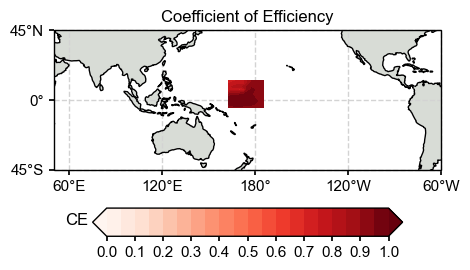

In [73]:
import seaborn as sns
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

fig = plt.figure(figsize=[5, 5])
ax = plt.subplot(projection=ccrs.PlateCarree(central_longitude=180))
ax.set_title('Coefficient of Efficiency')
latlon_range = [50, 300, -45, 45]
transform=ccrs.PlateCarree()

ax.set_extent(latlon_range, crs=transform)
lon_formatter = LongitudeFormatter(zero_direction_label=False)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

lon_ticks=[60, 120, 180, 240, 300]
lat_ticks=[-90, -45, 0, 45, 90]
lon_ticks = np.array(lon_ticks)
lat_ticks = np.array(lat_ticks)
lon_min, lon_max, lat_min, lat_max = latlon_range
mask_lon = (lon_ticks >= lon_min) & (lon_ticks <= lon_max)
mask_lat = (lat_ticks >= lat_min) & (lat_ticks <= lat_max)
ax.set_xticks(lon_ticks[mask_lon], crs=ccrs.PlateCarree())
ax.set_yticks(lat_ticks[mask_lat], crs=ccrs.PlateCarree())

levels = np.linspace(0, 1, 21)
cbar_labels = np.linspace(0, 1, 11)
cbar_title = 'CE'
extend = 'both'
cmap = 'Reds'
cbar_pad=0.1
cbar_orientation='horizontal'
cbar_aspect=10
cbar_fraction=0.35
cbar_shrink=0.8
font_scale=1.5
land_color=sns.xkcd_rgb['light grey']
ocean_color=sns.xkcd_rgb['white']
        
ax.add_feature(cfeature.LAND, facecolor=land_color, edgecolor=land_color)
ax.add_feature(cfeature.OCEAN, facecolor=ocean_color, edgecolor=ocean_color)
ax.coastlines()
im = ax.contourf(ds['lon'].values, ds['lat'].values, ce, levels, transform=transform, cmap=cmap, extend=extend)
cbar = fig.colorbar(
    im, ax=ax, orientation=cbar_orientation, pad=cbar_pad, aspect=cbar_aspect,
    fraction=cbar_fraction, shrink=cbar_shrink)
cbar.set_ticks(cbar_labels)
cbar.ax.set_title(cbar_title, x=-0.05, y=0.1)
    
LMRt.showfig(fig)

### Mean timeseries

In [79]:
import pyleoclim as pyleo

In [81]:
def geo_mean(field, lat):
    m = np.average(
        np.average(field, axis=-1), axis=-1, weights=np.cos(np.deg2rad(lat))
    )
    return m

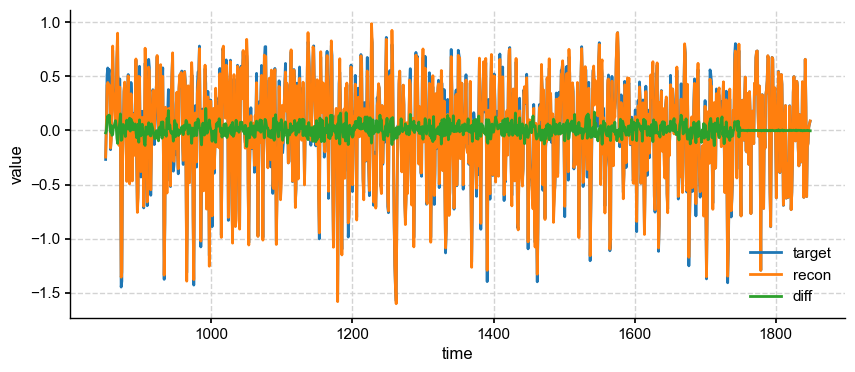

In [87]:
m_target = geo_mean(job.obs.fields['tas'].value, job.obs.fields['tas'].lat) 
ts_target = pyleo.Series(time=job.obs.fields['tas'].time, value=m_target)

m_recon = geo_mean(ds['recon'].values, ds['lat'].values)
ts_recon = pyleo.Series(time=ds['year'].values, value=m_recon)

fig, ax = ts_target.plot(mute=True, label='target')
ts_recon.plot(ax=ax, label='recon')
ax.plot(ds['year'].values, m_target-m_recon, label='diff')
ax.legend()
pyleo.showfig(fig)